# Preliminaries

### Libaries

In [1]:
# -*- coding: utf-8 -*-
# Python 3.12.6

# Internal Libs
import random
import os
from datetime import datetime
now = datetime.now()

# External Libs
import numpy as np
import pandas as pd

# MLP MATCHING ALGORITHM #
import pandas as pd

# Produced Libs:
## Data loader
from scripts.data_loader import DataLoader

## Filters
### Filters for AIS data
from scripts.filters.ais_filters import AISFilters as af, AISInterpolation as ai
### Filters for Norsat data
from scripts.filters.norsat_filters import NorsatFilters as nf
### Filters for SAR data
from scripts.filters.sar_filters import SARFilters as sf
### Filters for matched data
from scripts.filters.matched_filters import MatchedFilters as mf

## Matching algorithms
### Nearest neighbour
from scripts.matchers.nearest_neighbour_matching import NearestNeighbourMatcher as nnm
### Hungarian method
from scripts.matchers.hungarian_algorithm_matching import HungarianAlgorithmMatcher as hum
### Clustering methods
from scripts.matchers.clustering_matching import ClusteringMatcher as cma

## Plotting and understanding
### visualize uncertainty
from scripts.plots.difference_visualizer import DifferenceVisualizer as dv
### Map plotting
from scripts.plots.map_plots import MapPlots
### Cluster plotting
from scripts.plots.cluster_plot import ClusterPlot as cp

#from scripts.data_formatter import DataProcessor as dp
#from scripts.matching import hungarian_method
#from scripts.plotter import Plotter as pl

### Data loading and filtering

In [2]:
# Datetime string for saving plots
datetime_str = datetime.now().strftime("%Y%m%d_%H%M")

# Define date and time filter
date_key = '03-11-2022'

# PATHS, dataframe and shpfile #
# Define paths
base_path = "C:\\Users\\abelt\\OneDrive\\Dokumenter\\GitHub\\Ship_datafusion\\data"
## File names ##
# AIS
ais_files = {
    '02-11-2022': 'ais\\ais_110215.csv',
    '03-11-2022': 'ais\\ais_110315.csv',
    '05-11-2022': 'ais\\ais_1105.csv'
}
# SAR
sar_files = {
    '02-11-2022': 'sar\\Sentinel_1_detection_20221102T1519.json',
    '03-11-2022': 'sar\\Sentinel_1_detection_20221103T154515.json',
    '05-11-2022': 'sar\\Sentinel_1_detection_20221105T162459.json'
}
# Norsat
norsat_files = {
    '02-11-2022': 'norsat\\Norsat3-N1-JSON-Message-DK-2022-11-02T151459Z.json',
    '03-11-2022': 'norsat\\Norsat3-N1-JSON-Message-DK-2022-11-03T152759Z.json',
    '05-11-2022': 'norsat\\Norsat3-N1-JSON-Message-DK-2022-11-05T155259Z.json'
}

# LOADING #
data_loader = DataLoader(base_path = base_path, ais_files = ais_files, sar_files = sar_files, norsat_files = norsat_files)
ais_loader, sar_loader, norsat_loader = data_loader.load_data()

# Extracting one day of data for each data source #
sar_data = sar_loader.sar_object_dfs[date_key].copy()
ais_data = ais_loader.dfs_ais[date_key].copy()
norsat_data = norsat_loader.dfs_norsat[date_key].copy()

AIS Data Loaded:
dict_keys(['02-11-2022', '03-11-2022', '05-11-2022'])
Columns for the first DataFrame: Index(['ais_id', 'mmsi', 'TimeStamp', 'latitude', 'longitude', 'length',
       'width', 'sog', 'cog', 'source'],
      dtype='object')
Norsat Data Loaded:
dict_keys(['02-11-2022', '03-11-2022', '05-11-2022'])
Columns for the first DataFrame: Index(['norsat_id', 'TimeStamp', 'latitude', 'longitude',
       'CollectionInformation', 'NRDEmitterPosition', 'CandidateList',
       'source', 'UncertaintyEllipsePoints'],
      dtype='object')
SAR Data Loaded:
dict_keys(['02-11-2022', '03-11-2022', '05-11-2022'])
Columns for the first DataFrame: Index(['ProductType', 'Polarization', 'Swath', 'TimeStamp', 'TimeStamp_end',
       'Name', 'Satellite', 'Shape', 'Objects', 'source'],
      dtype='object')
SAR object Loaded:
dict_keys(['02-11-2022', '03-11-2022', '05-11-2022'])
Columns for the first DataFrame: Index(['sar_id', 'sar_image_id', 'TimeStamp', 'latitude', 'longitude', 'width',
       '

In [ ]:
# Datetime string for saving plots
datetime_str = datetime.now().strftime("%Y%m%d_%H%M")

# Define date and time filter
date_key = '03-11-2022'

# PATHS, dataframe and shpfile #
# Define paths
base_path = "C:\\Users\\abelt\\OneDrive\\Dokumenter\\GitHub\\Ship_datafusion\\data"
## File names ##
# AIS
ais_files = {
    '02-11-2022': 'ais\\ais_110215.csv',
    '03-11-2022': 'ais\\ais_110315.csv',
    '05-11-2022': 'ais\\ais_1105.csv'
}
# SAR
sar_files = {
    '02-11-2022': 'sar\\Sentinel_1_detection_20221102T1519.json',
    '03-11-2022': 'sar\\Sentinel_1_detection_20221103T154515.json',
    '05-11-2022': 'sar\\Sentinel_1_detection_20221105T162459.json'
}
# Norsat
norsat_files = {
    '02-11-2022': 'norsat\\Norsat3-N1-JSON-Message-DK-2022-11-02T151459Z.json',
    '03-11-2022': 'norsat\\Norsat3-N1-JSON-Message-DK-2022-11-03T152759Z.json',
    '05-11-2022': 'norsat\\Norsat3-N1-JSON-Message-DK-2022-11-05T155259Z.json'
}

# LOADING #
data_loader = DataLoader(base_path = base_path, ais_files = ais_files, sar_files = sar_files, norsat_files = norsat_files)
ais_loader, sar_loader, norsat_loader = data_loader.load_data()

# Extracting one day of data for each data source #
sar_data = sar_loader.sar_object_dfs[date_key].copy()
ais_data = ais_loader.dfs_ais[date_key].copy()
norsat_data = norsat_loader.dfs_norsat[date_key].copy()

In [3]:
# FILTERING #
# Filter SAR data
## Filter out SAR data based on on_sea
sar_data = sar_data[sar_data['on_sea'] == True] # This is the SAR data that is on sea
## Filter out SAR data based on class 0
filtered_sar_data = sf.filter_sar_probabilities(sar_data) # This is the SAR data that is class 0

# Filter AIS data
## Define the time threshold for comparison
delta_time = pd.Timedelta(hours=1)
## Finding vessels in AIS data that are close to objects in SAR and Norsat
mmsi_ais_sar = af.ais_find_matching_vessels(AIS_data=ais_data, comparison_data=sar_data, delta_time=delta_time) # This is the AIS data that is close to SAR data time
mmsi_ais_norsat = af.ais_find_matching_vessels(AIS_data=ais_data, comparison_data=norsat_data, delta_time=delta_time) # This is the AIS data that is close to Norsat data time
## Filter AIS data by MMSI
filtered_ais_to_sar = af.filter_by_mmsi(mmsi_ais_sar, ais_data) # This is the AIS data by MMSI numbers that are close to SAR data
filtered_ais_to_norsat = af.filter_by_mmsi(mmsi_ais_norsat, ais_data) # This is the AIS data by MMSI numbers that are close to Norsat data

#### Interpolation with filtering

In [4]:
# INTERPOLATION WITH FILTERING #
# Interpolate MMSI points for filtered AIS data to SAR and Norsat
print('Interpolating MMSI points for filtered AIS data to:')
## Interpolate MMSI points for filtered AIS data to SAR
print('SAR')
interpolated_ais_sar, not_enough_sar = ai.ais_interpolate_mmsi_points(filtered_ais_to_sar, sar_data['TimeStamp'])
## Interpolate MMSI points for filtered AIS data to Norsat
print('Norsat')
interpolated_ais_norsat, not_enough_norsat = ai.ais_interpolate_mmsi_points(filtered_ais_to_norsat, norsat_data['TimeStamp'])

# Evaluate the speed over ground between interpolation point and before/after points
## AIS to SAR interpolation dataframe
interpolated_ais_sar = ai.evaluate_sog_between_points(interpolated_ais_sar, 35)
## AIS to Norsat interpolation dataframe
interpolated_ais_norsat = ai.evaluate_sog_between_points(interpolated_ais_norsat, 35)

## Filter out AIS data that has a speed over ground of > 35 knots
### AIS to SAR interpolation dataframe
interpolated_ais_sar = interpolated_ais_sar[
    ~interpolated_ais_sar['exceeds_threshold_before'] & 
    ~interpolated_ais_sar['exceeds_threshold_after']]
### AIS to Norsat interpolation dataframe
interpolated_ais_norsat = interpolated_ais_norsat[
    ~interpolated_ais_norsat['exceeds_threshold_before'] & 
    ~interpolated_ais_norsat['exceeds_threshold_after']]
print('Speed over ground filtering, (SOG > 35 knots):')
print('MMSI numbers with AIS data that do not exceed the SOG threshold for SAR:', len(interpolated_ais_sar.groupby('mmsi')))
print('MMSI numbers with AIS data that do not exceed the SOG threshold for Norsat:', len(interpolated_ais_norsat.groupby('mmsi')))

Interpolating MMSI points for filtered AIS data to:
SAR
MMSI numbers with insufficient data points: 99 out of 2515
Norsat
MMSI numbers with insufficient data points: 98 out of 2520
Speed over ground filtering, (SOG > 35 knots):
MMSI numbers with AIS data that do not exceed the SOG threshold for SAR: 2404
MMSI numbers with AIS data that do not exceed the SOG threshold for Norsat: 2406


In [5]:
print('SAR data points used:', len(filtered_sar_data))
print('AIS track by used:', len(interpolated_ais_norsat.groupby('mmsi')))
print('Norsat data points used:', len(norsat_data))

SAR data points used: 478
AIS track by used: 2406
Norsat data points used: 161


# Matching

## Baseline matching

### Non clustered matching

In [6]:
## Non clustered matching ##
# NEAREST NEIGHBOUR MATCHING #
nnm_ais_sar = nnm.nearest_neighbour_matching(df1 = interpolated_ais_sar, df2 = filtered_sar_data, id1_col = 'mmsi', id2_col = 'sar_id')
nnm_ais_norsat = nnm.nearest_neighbour_matching(df1 = interpolated_ais_norsat, df2 = norsat_data, id1_col = 'mmsi', id2_col = 'norsat_id')
nnm_sar_norsat = nnm.nearest_neighbour_matching(df1 = filtered_sar_data, df2 = norsat_data, id1_col = 'sar_id', id2_col = 'norsat_id')
NNM = {'ais_sar': nnm_ais_sar, 'ais_norsat': nnm_ais_norsat, 'sar_norsat': nnm_sar_norsat}

# HUNGARIAN METHOD MATCHING #
hum_ais_sar, ais_sar_cost_matrix = hum.hungarian_method_matching(df1 = interpolated_ais_sar, df2 = filtered_sar_data, id1_col = "mmsi", id2_col = "sar_id")
hum_ais_norsat, ais_norsat_cost_matrix = hum.hungarian_method_matching(df1 = interpolated_ais_norsat, df2 = norsat_data,  id1_col = "mmsi", id2_col = "norsat_id")
hum_sar_norsat, sar_norsat_cost_matrix = hum.hungarian_method_matching(df1 = filtered_sar_data, df2 = norsat_data,  id1_col = "sar_id", id2_col = "norsat_id")
HUM = {'ais_sar': hum_ais_sar, 'ais_norsat': hum_ais_norsat, 'sar_norsat': hum_sar_norsat}

### Clusted matching

In [7]:
## Clustering variables ##
epsilon = 7 # Epsilon for DBSCAN, UNIT: kilometers
min_samples = 2 # Minimum samples for DBSCAN
print('Clustering with epsilon:', epsilon, 'km \n Minimum samples:', min_samples)

Clustering with epsilon: 7 km 
 Minimum samples: 2


In [8]:
## Perform DBSCAN clustering once for each pair ##
clustered_ais_sar = cma.dbscan_clustering(
    df1=interpolated_ais_sar, df2=filtered_sar_data, 
    ids=['mmsi', 'sar_id'], sources=['ais', 'sar'], eps=epsilon, min_samples=min_samples)
clustered_ais_norsat = cma.dbscan_clustering(
    df1=interpolated_ais_norsat, df2=norsat_data, 
    ids=['mmsi', 'norsat_id'], sources=['ais', 'norsat'], eps=epsilon, min_samples=min_samples)
clustered_sar_norsat = cma.dbscan_clustering(
    df1=filtered_sar_data, df2=norsat_data, 
    ids=['sar_id', 'norsat_id'], sources=['sar', 'norsat'], eps=epsilon, min_samples=min_samples)

In [9]:
clostered_ais_sar = cma.hdbscan_clustering(df1=interpolated_ais_sar, df2=filtered_sar_data, 
    ids=['mmsi', 'sar_id'], sources=['ais', 'sar'], min_cluster_size = epsilon, min_samples=min_samples)

HHUM_ais_sar = cma.HUM_clustering(clostered_ais_sar, ids=['mmsi', 'sar_id'], sources=['ais', 'sar'])
HNNM_ais_sar = cma.NNM_clustering(clostered_ais_sar, ids=['mmsi', 'sar_id'], sources=['ais', 'sar'])

In [10]:
## Clustered matching ##
# HUNGARIAN METHOD WITH CLUSTERING (using pre-clustered data) #
CHUM_ais_sar = cma.HUM_clustering(clustered_ais_sar, ids=['mmsi', 'sar_id'], sources=['ais', 'sar'])
CHUM_ais_norsat = cma.HUM_clustering(clustered_ais_norsat, ids=['mmsi', 'norsat_id'], sources=['ais', 'norsat'])
CHUM_sar_norsat = cma.HUM_clustering(clustered_sar_norsat, ids=['sar_id', 'norsat_id'], sources=['sar', 'norsat'])

CHUM = {'ais_sar': CHUM_ais_sar, 'ais_norsat': CHUM_ais_norsat, 'sar_norsat': CHUM_sar_norsat}

# NEAREST NEIGHBOUR METHOD WITH CLUSTERING (using pre-clustered data) #
CNNM_ais_sar = cma.NNM_clustering(clustered_ais_sar, ids=['mmsi', 'sar_id'], sources=['ais', 'sar'])
CNNM_ais_norsat = cma.NNM_clustering(clustered_ais_norsat, ids=['mmsi', 'norsat_id'], sources=['ais', 'norsat'])
CNNM_sar_norsat = cma.NNM_clustering(clustered_sar_norsat, ids=['sar_id', 'norsat_id'], sources=['sar', 'norsat'])

CNNM = {'ais_sar': CNNM_ais_sar, 'ais_norsat': CNNM_ais_norsat, 'sar_norsat': CNNM_sar_norsat}

### Sorting for data match

In [16]:
# SORTING #
# Sort the dataframes into dictionaries
ais_sar = {'nnm': NNM['ais_sar'], 'hum': HUM['ais_sar'], 'cnnm': CNNM['ais_sar'], 'chum': CHUM['ais_sar']}
ais_norsat = {'nnm': NNM['ais_norsat'], 'hum': HUM['ais_norsat'],'cnnm': CNNM['ais_norsat'], 'chum': CHUM['ais_norsat']}
sar_norsat = {'nnm': NNM['sar_norsat'], 'hum': HUM['sar_norsat'],'cnnm': CNNM['sar_norsat'], 'chum': CHUM['sar_norsat']}

## Machine Learning matching

In [12]:
model_path = r'C:\Users\abelt\OneDrive\Dokumenter\GitHub\Ship_datafusion\models\model_20241029_1414.pth'
model_params = {'input_dim' :  2, 'hidden_dim' : 256, 'output_dim' : 2, 'depth' : 2, 'batch size' : 32}

### Nearest Neighbour

In [13]:
# Nearest Neighbour Neural Matching #
MNNM_ais_sar = cma.MNNM_clustering(
    clustered_data=clustered_ais_sar, 
    ids=['mmsi', 'sar_id'], 
    sources=['ais', 'sar'],
    model_params=model_params, 
    model_path=model_path)

MNNM_ais_norsat = cma.MNNM_clustering(
    clustered_data=clustered_ais_norsat, 
    ids=['mmsi', 'norsat_id'], 
    sources=['ais', 'norsat'], 
    model_params=model_params,
    model_path=model_path)

MNNM_sar_norsat = cma.MNNM_clustering(
    clustered_data=clustered_sar_norsat, 
    ids=['sar_id', 'norsat_id'], 
    sources=['sar', 'norsat'], 
    model_params=model_params,
    model_path=model_path)

MNNM = {'ais_sar': MNNM_ais_sar, 'ais_norsat': MNNM_ais_norsat, 'sar_norsat': MNNM_sar_norsat}
ais_sar['mnnm'] = MNNM['ais_sar']
ais_norsat['mnnm'] = MNNM['ais_norsat']
sar_norsat['mnnm'] = MNNM['sar_norsat']

c:\Users\abelt\OneDrive\Dokumenter\GitHub\Ship_datafusion\First_step_mathching\scripts\matchers\clustering_matching.py:171: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  sta

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\abelt\\OneDrive\\Dokumenter\\GitHub\\Ship_datafusion\\models\\model_20241029_1414.pth'

### Hungarian algorithm

In [ ]:
# Hungarian Method Neural Matching #
MHUM_ais_sar = cma.MHUM_clustering(
    clustered_data=clustered_ais_sar, 
    ids=['mmsi', 'sar_id'], 
    sources=['ais', 'sar'],
    model_params=model_params, 
    model_path=model_path)

MHUM_ais_norsat = cma.MHUM_clustering(
    clustered_data=clustered_ais_norsat, 
    ids=['mmsi', 'norsat_id'], 
    sources=['ais', 'norsat'], 
    model_params=model_params,
    model_path=model_path)

MHUM_sar_norsat = cma.MHUM_clustering(
    clustered_data=clustered_sar_norsat, 
    ids=['sar_id', 'norsat_id'], 
    sources=['sar', 'norsat'], 
    model_params=model_params,
    model_path=model_path)

MHUM = {'ais_sar': MHUM_ais_sar, 'ais_norsat': MHUM_ais_norsat, 'sar_norsat': MHUM_sar_norsat}
ais_sar['mhum'] = MHUM['ais_sar']
ais_norsat['mhum'] = MHUM['ais_norsat']
sar_norsat['mhum'] = MHUM['sar_norsat']

## THRESHOLDING OF DISTANCE TO BETWEEN MATCH

In [17]:
# Thresholding by distance
d_threshold = 15  # km

thresholded_ais_sar = mf.filter_by_distance(ais_sar, distance_threshold=d_threshold, printer=False)
thresholded_ais_norsat = mf.filter_by_distance(ais_norsat, distance_threshold=d_threshold, printer=False)
thresholded_sar_norsat = mf.filter_by_distance(sar_norsat, distance_threshold=d_threshold, printer=False)

# Visualizing

In [18]:
dfs = [thresholded_ais_sar,thresholded_ais_norsat,thresholded_sar_norsat] # 
dftes = [ais_sar,ais_norsat,sar_norsat]

## Venn Diagram

### Baseline models

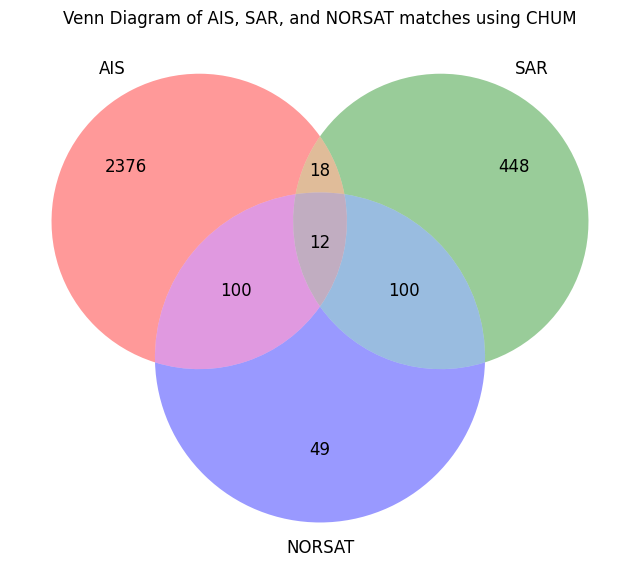

In [24]:
outerLayer = {'ais' : {'df' : interpolated_ais_norsat.groupby('mmsi'), 'length' : len(interpolated_ais_norsat.groupby('mmsi'))}, 
              'sar' : {'df' : filtered_sar_data, 'length' : len(filtered_sar_data)}, 
              'norsat' : {'df' : norsat_data, 'length' : len(norsat_data) }}

dv.match_venn3(outerLayer, dfs, 'chum', ['mmsi', 'sar_id', 'norsat_id'], ['AIS', 'SAR', 'NORSAT'])


#### Non clustered matching

##### Nearest Neighbour

In [ ]:
# VENN DIAGRAMS FUNCTIONS#
model = 'nnm'
id_columns = ['mmsi', 'sar_id', 'norsat_id']
labels = ['AIS/SAR', 'AIS/NORSAT', 'SAR/NORSAT']

# Double matching
dv.match_venn2(df1=dfs[0][model], df2= dfs[1][model], id_column='mmsi', df1_label='AIS/SAR', df2_label='AIS/NORSAT', model=model)

# Triple matching
dv.match_venn3(dfs=dfs, model= model, id_columns=id_columns, labels=labels)

##### Hungarian Algorithm

In [23]:
dfs[0][model].shape, dfs[1][model].shape

((174, 7), (112, 7))

In [ ]:
model = 'chum'
id_columns = ['mmsi', 'sar_id', 'norsat_id']
labels = ['AIS/SAR', 'AIS/NORSAT', 'SAR/NORSAT']

print('Number of AIS detected ships to sar: ', len(interpolated_ais_sar.groupby('mmsi')))
print('Number of AIS detected ships to norsat: ', len(interpolated_ais_norsat.groupby('mmsi')), '\n')
print('Number of SAR detected ships: ', len(filtered_sar_data))
print('Number of Norsat detected ships: ', len(norsat_data), '\n')

print('Number of matches between AIS and SAR: ', len(dfs[0][model]))
print('Number of matches between AIS and Norsat: ', len(dfs[1][model]))
print('Number of matches between SAR and Norsat: ', len(dfs[2][model]))



Number of AIS detected ships to sar:  2404
Number of AIS detected ships to norsat:  2406 

Number of SAR detected ships:  478
Number of Norsat detected ships:  161 

Number of matches between AIS and SAR:  174
Number of matches between AIS and Norsat:  112
Number of matches between SAR and Norsat:  34


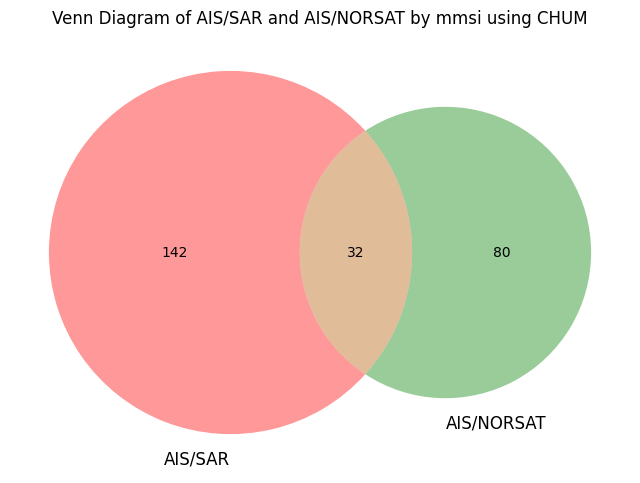

TypeError: DifferenceVisualizer.match_venn3() missing 1 required positional argument: 'outerLayer'

In [ ]:
# VENN DIAGRAMS FUNCTIONS#
model = 'chum'
id_columns = ['mmsi', 'sar_id', 'norsat_id']
labels = ['AIS/SAR', 'AIS/NORSAT', 'SAR/NORSAT']

# Double matching
dv.match_venn2(df1=dfs[0][model], df2= dfs[1][model], id_column='mmsi', df1_label='AIS/SAR', df2_label='AIS/NORSAT', model=model)

#### Clustered matching

##### Nearest Neighbour

In [ ]:
# VENN DIAGRAMS FUNCTIONS#
model = 'cnnm'
id_columns = ['mmsi', 'sar_id', 'norsat_id']
labels = ['AIS/SAR', 'AIS/NORSAT', 'SAR/NORSAT']

# Double matching
dv.match_venn2(df1=dfs[0][model], df2= dfs[1][model], id_column='mmsi', df1_label='AIS/SAR', df2_label='AIS/NORSAT', model=model.upper())

# Triple matching
dv.match_venn3(dfs=dfs, model= model, id_columns=id_columns, labels=labels)

##### Hungarian algorithm

In [14]:
# VENN DIAGRAMS FUNCTIONS#
model = 'chum'
id_columns = ['mmsi', 'sar_id', 'norsat_id']
labels = ['AIS/SAR', 'AIS/NORSAT', 'SAR/NORSAT']

# Double matching
dv.match_venn2(df1=dfs[0][model], df2= dfs[1][model], id_column='mmsi', df1_label='AIS/SAR', df2_label='AIS/NORSAT', model=model)

# Triple matching
dv.match_venn3(dfs=dfs, model= model, id_columns=id_columns, labels=labels)

NameError: name 'dfs' is not defined

### Machine learning model

#### Nearest Neighbour

In [ ]:
# VENN DIAGRAMS FUNCTIONS#
model = 'mnnm'
id_columns = ['mmsi', 'sar_id', 'norsat_id']
labels = ['AIS/SAR', 'AIS/NORSAT', 'SAR/NORSAT']

# Double matching
dv.match_venn2(df1=dfs[0][model], df2= dfs[1][model], id_column='mmsi', df1_label='AIS/SAR', df2_label='AIS/NORSAT', model=model.upper())

# Triple matching
dv.match_venn3(dfs=dfs, model= model, id_columns=id_columns, labels=labels)

#### Hungarian algorithm

In [ ]:
# VENN DIAGRAMS FUNCTIONS#
model = 'mhum'
id_columns = ['mmsi', 'sar_id', 'norsat_id']
labels = ['AIS/SAR', 'AIS/NORSAT', 'SAR/NORSAT']

# Double matching
dv.match_venn2(df1=dfs[0][model], df2= dfs[1][model], id_column='mmsi', df1_label='AIS/SAR', df2_label='AIS/NORSAT', model=model)

# Triple matching
dv.match_venn3(dfs=dfs, model= model, id_columns=id_columns, labels=labels)

In [ ]:
print(dfs[0], '\n')
print(dfs[0][model])

## Uncertainty and RMS evaluation

In [ ]:
model = 'mnnm'

### Lat/Lon difference

In [ ]:
models = ['mhum', 'mnnm']
for md in models:
    dv.plot_lat_lon_differences(ais_sar[md], ['df1_lat', 'df1_lon'], ['df2_lat', 'df2_lon'], f'AIS/SAR {md.upper()}')


### Distance histogram

In [ ]:
models = ['hum','cnnm','chum']
for md in models:
    dv.plot_distance_histogram_with_pdf(dfs[0][md],'distance_km', f'AIS/SAR, {md.upper()}')

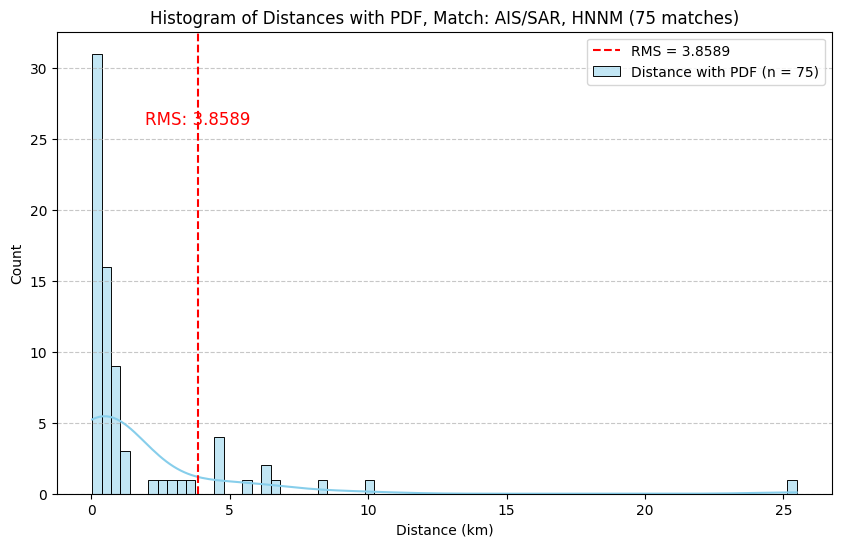

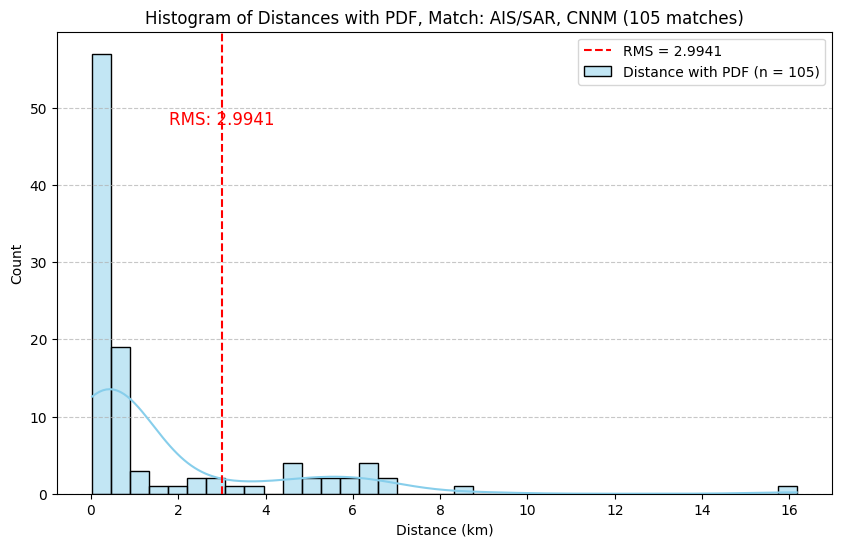

In [24]:
dv.plot_distance_histogram_with_pdf(HNNM_ais_sar, 'distance_km', f'AIS/SAR, {'HNNM'}')
dv.plot_distance_histogram_with_pdf(ais_sar['cnnm'], 'distance_km', f'AIS/SAR, {'cnnm'.upper()}')

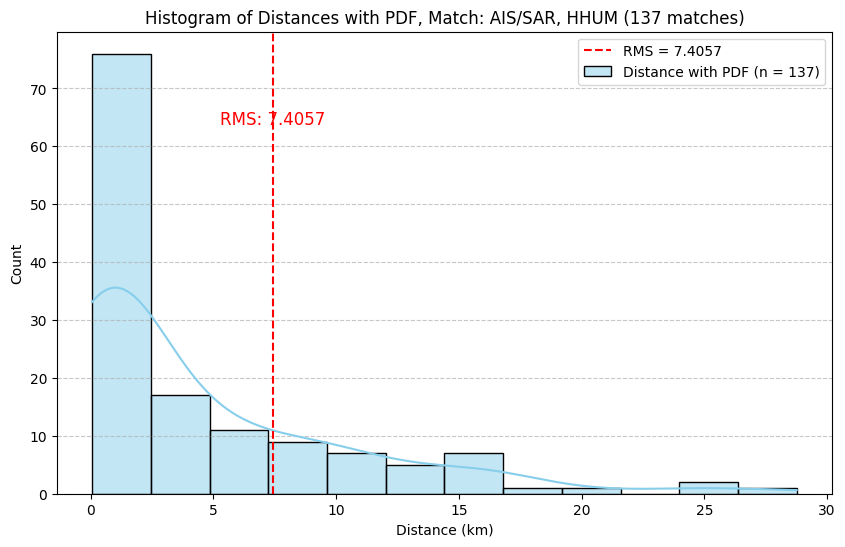

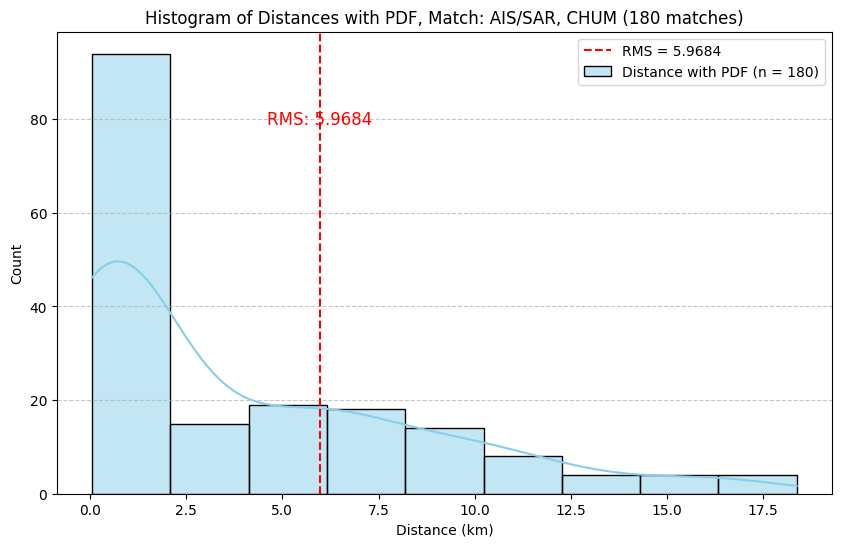

In [26]:
dv.plot_distance_histogram_with_pdf(HHUM_ais_sar, 'distance_km', f'AIS/SAR, {'HHUM'}')
dv.plot_distance_histogram_with_pdf(ais_sar['chum'], 'distance_km', f'AIS/SAR, {'chum'.upper()}')

In [ ]:
dv.plot_distance_histogram_with_pdf(dfs[0]['mhum'], 'distance_km', f'AIS/SAR with, {'mhum'.upper()}')

## Maps

In [ ]:
map_plots = MapPlots()
folder_path_folium = r'C:\Users\abelt\OneDrive\Dokumenter\GitHub\Ship_datafusion\First_step_mathching\images\folium'

#[thresholded_ais_sar,thresholded_ais_norsat,thresholded_sar_norsat]

### Cartopy maps

In [ ]:
# Map of clustered nearest neighbour and clustered hungarian method
model = 'cnnm'
id_columns = ['mmsi', 'sar_id']
labels = ['AIS', 'SAR']

map_plots.plot_matched(df = dfs[0][model], date= date_key, id_columns= ['mmsi', 'sar_id'], 
                             df1_pos_columns= ['df1_lat', 'df1_lon'], df2_pos_columns=['df2_lat', 'df2_lon'],
                             data_labels= labels, model= model.upper())

model = 'chum'
id_columns = ['mmsi', 'sar_id']
labels = ['AIS', 'SAR']

map_plots.plot_matched(df = dfs[0][model], date= date_key, id_columns= ['mmsi', 'sar_id'], 
                             df1_pos_columns= ['df1_lat', 'df1_lon'], df2_pos_columns=['df2_lat', 'df2_lon'],
                             data_labels= labels, model= model.upper())

In [ ]:
# Map of Machine Nearest neighbour matching and Machine Hungarian method matching
model = 'mnnm'
id_columns = ['mmsi', 'sar_id']
labels = ['AIS', 'SAR']

map_plots.plot_matched(df = dfs[0][model], date= date_key, id_columns= ['mmsi', 'sar_id'], 
                             df1_pos_columns= ['df1_lat', 'df1_lon'], df2_pos_columns=['df2_lat', 'df2_lon'],
                             data_labels= labels, model= model.upper())
model = 'mhum'
id_columns = ['mmsi', 'sar_id']
labels = ['AIS', 'SAR']

map_plots.plot_matched(df = dfs[0][model], date= date_key, id_columns= ['mmsi', 'sar_id'], 
                             df1_pos_columns= ['df1_lat', 'df1_lon'], df2_pos_columns=['df2_lat', 'df2_lon'],
                             data_labels= labels, model= model.upper())

### Folium maps

In [ ]:
ais_sar['mhum']

In [ ]:
map_plots.folium_matched(df=ais_sar['mhum'], id_columns= ['mmsi', 'sar_id'], df1_pos_columns= ['df1_lat', 'df1_lon'],
                           df2_pos_columns=['df2_lat', 'df2_lon'], folder_path = folder_path_folium, filename=f'hum_ais_sar_{datetime_str}')
#map_plots.folium_matched(df=ais_sar['cnnm'], id_columns= ['mmsi', 'sar_id'], df1_pos_columns= ['df1_lat', 'df1_lon'],
 #                          df2_pos_columns=['df2_lat', 'df2_lon'], folder_path = folder_path_folium, filename='clustered_nnm_ais_sar')
#map_plots.folium_matched(df=ais_norsat['mhum'], id_columns = ['mmsi', 'norsat_id'], df1_pos_columns = ['df1_lat', 'df1_lon'],
#                           df2_pos_columns = ['df2_lat', 'df2_lon'],folder_path = folder_path_folium, filename='machine_ais_norsat')
# map_plots.folium_matched(df=ais_sar['chum'], id_columns = ['mmsi', 'sar_id'], df1_pos_columns = ['df1_lat', 'df1_lon'],
#                           df2_pos_columns = ['df2_lat', 'df2_lon'], folder_path = folder_path_folium, filename='cham_ais_sar')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the training log data
file_name = "training_log_20241101_1941"
file_path = r'C:\Users\abelt\OneDrive\Dokumenter\GitHub\Ship_datafusion\{}.csv'.format(file_name)

def plot_training_log(file_path):
    df = pd.read_csv(file_path)

    # If 'Epoch' column is a string, extract digits as integers
    df['Epoch'] = df['Epoch'].str.extract(r'(\d+)').astype(int)

    # Convert 'Model Saved' column to boolean if not already
    df['Model Saved'] = df['Model Saved'] == 'True'

    # Plot the training and validation loss
    plt.figure(figsize=(10, 6))
    plt.plot(df['Epoch'], df['Train Loss']*100000, label='Train Loss')
    plt.plot(df['Epoch'], df['Val Loss']*20000, label='Validation Loss')

    # Add dotted vertical lines for epochs where model was saved
    for epoch in df[df['Model Saved']]['Epoch']:
        plt.axvline(x=epoch, color='gray', linestyle='--', alpha=0.5, label='Model Saved' if epoch == df[df['Model Saved']]['Epoch'].iloc[0] else "")

    # Customize plot
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss over Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_training_log(file_path)


# TO-DO
- Triple matching function, through AIS mmsi numbers.
    - triple_match_df = sar_df.merge(norsat_df, on=['mmsi'])
    
- Venn diagram
    - By matching models, for individual data types.

- Generate Map plots: 
    - SAR & AIS
    - SAR & RF
    - AIS & RF
    - SAR, AIS, & RF
     <br> USE 
    "f"MMSI: {mmsi_number_row}<br>{df1_index_column}: {index_row}<br>Distance: {distance_row}
    <br>Matching:"

- Create uncertainty chart or correlation value chart
    - Colorbar based on the angle of the uncertainty ellipse for a uncertainty plot

- Create a "true" matches 
- Assume a one data type to be a reference point

- Use an MLP to create a cost matrix. The data loader should be a 
    - Produce more data to train on, through AIS websites and using multiple days.
        - Filter and remove such that no two days AIS tracks are mixed into one. 
    - 


# TO-DO AI:
- ai_loader.py
    1. Efficient Data Handling and Memory Usage
        - Batch Processing: Instead of loading the entire AIS dataset into memory, consider lazy loading or loading data in smaller chunks. If the dataset is large, this can save memory.
        - Using PyTorch’s DataLoader with Collate Function: Optimize your data loader by implementing a custom collate function to handle variable-length tracks, or by padding sequences to make batch processing easier.

    2. Improved Data Normalization
        - Unified Encoding with Fourier Features: Incorporating double Fourier encoding for geographic coordinates (latitude, longitude) can improve the encoding of spatial data. Since you’re using Fourier features in the MLP's custom layer, applying it here would create consistency.
        - Robust Missing Value Handling: Replace "absurd" values like -999.0 with something more conventional like zero or the mean of each feature to reduce outlier influence during training. If you continue to use -999.0, add a custom function to handle these edge cases more effectively.

    3. Enhanced Dataset Splitting and Shuffling
        - Stratified Splitting: If some vessels have multiple records in different time intervals or locations, consider splitting the data so that both training and validation sets have similar MMSI distributions. This can help the model generalize better.
        - Time-Based or Spatial Splits: Given the geospatial and time-based nature of AIS data, you might want to split the dataset by time or location to avoid data leakage, ensuring that the validation set contains unique tracks or locations.

    4. Data Augmentation
        - Noise Injection in Coordinates: For AIS data, consider injecting small amounts of random noise into the coordinates during training to simulate slight GPS inaccuracies, which can improve robustness.
        - Synthetic COG/SOG Variations: Slightly varying COG and SOG within realistic bounds could also serve as augmentation, especially if certain routes or vessels are overrepresented.

    5. Simplify and Modularize Functions
        - Separate Concerns in process_data: Break down the process_data function into smaller, reusable functions (e.g., normalize_coordinates, normalize_sog_cog). This will improve readability and allow each function to be tested independently.
        - Helper Functions for Date-Formatted AIS Loading: Since import_data_fn is focused on loading specific AIS dates, create separate functions to manage these loading patterns more flexibly, e.g., load_single_date and load_multiple_dates.

    6. Error Handling and Logging
        - Verbose Logging: Add detailed logging within the functions for data loading and processing. This helps in debugging data-loading issues, especially when dealing with large datasets across different dates.
        Error Handling for Missing Files: Introduce checks to handle cases where expected AIS files for certain dates are missing, and log errors or warnings accordingly.

    7. Optimize Grouping and Unique Track Creation
        - Optimized create_unique_tracks_dataframe: This function could be made faster by avoiding unnecessary copies of data and directly appending new data to the list, especially if dfs_ais contains many dates and records.
        - Parallel Processing for Grouping: If the data is very large, use parallelization (with joblib or concurrent.futures) when creating unique tracks, grouping by MMSI, or processing each date separately. This could significantly speed up your processing time.

    8. Enhanced DataLoader Integration
        - Create Caching Mechanism: If you often load and process the same AIS files, consider implementing a caching mechanism to store the preprocessed data, saving time on repeated runs.
        - Custom Sampling Strategy: Incorporate a custom sampling strategy in split_dataset to ensure balanced sampling, particularly if certain MMSIs or dates have a much higher density of records.

    9. Experiment with Spatial and Temporal Encoding
        - Spatio-Temporal Data Encoding: Experiment with techniques like spatio-temporal encodings (e.g., treating latitude, longitude, and timestamps as one unit) or position encoding techniques used in transformers, especially if timestamps are crucial for your application.
# Notes:
- Beskriv med "egen fornuft" fejlkilder, for at begynder og overveje hvordan de kan mitigeres, fjernes eller accepteres.
- Real sar opløsning 22 meter, men oversampler for til 10x10
- https://e2eml.school/matplotlib_points.html


# IDEAS:

## model approach
1. Domain Adaptation Through Preprocessing

    Normalize spatial and temporal differences across domains (e.g., SAR, RF) to resemble AIS characteristics. For instance, apply similar spatial jittering or temporal windowing techniques during preprocessing for SAR and RF data, so the AIS-trained model can more easily apply its learned features to new domains.
    Domain-specific scaling: Account for SAR’s higher spatial resolution (and potential RF uncertainty) by scaling inputs to match AIS data distribution.

2. Self-Supervised Contrastive Learning

    Pre-train the model on AIS data in a contrastive learning framework, where it learns to distinguish between "similar" and "dissimilar" points within a given time and distance threshold.
    This approach teaches the MLP to recognize features indicating closeness in time and space, which can transfer well to other data types when doing cross-domain matching.

3. Loss Function Adaptation for Cross-Domain Matching

    Introduce a margin-based loss function during testing, especially when testing AIS-SAR or AIS-RF matching. This allows the model to "accept" close but imperfect matches based on domain-specific variability.
    For example, SAR data points may often have a higher spatial precision, so you could set a lower margin for SAR matches to favor close spatial proximity, adapting this threshold based on RF’s spatial variability.

4. Testing with Fine-Tuning or Ensemble Models

    Fine-tune the model on a small labeled dataset of AIS-SAR, AIS-RF, and SAR-RF pairs if available. Fine-tuning can adapt the MLP to capture domain-specific characteristics without retraining from scratch.
    Alternatively, consider an ensemble approach where each domain (AIS, SAR, RF) has its own lightweight model trained on AIS embeddings, and each model makes domain-specific adjustments to matching predictions.

# Dealing with time and position discrepancies
For training your MLP to handle distance matching with time and position discrepancies, a few strategies can help bridge the temporal and spatial gaps:
1. Temporal Windowing

    Allow the model to match points within a reasonable time window, rather than requiring exact temporal alignment.
    You could define a maximum time difference (e.g., within 5 or 10 minutes) and train the model to match pairs within this window. This allows the model to learn patterns in location changes over short time frames, making it resilient to time delays.

2. Feature Engineering for Temporal Offsets

    Add time difference as an input feature to your MLP so the model can consider it during distance matching.
    For instance, include a normalized time difference as part of the input, which can help the model learn to discount distance changes based on elapsed time (e.g., if points are farther apart but close in time).

3. Introduce Synthetic Data with Time Differences

    To help the model generalize better, consider creating synthetic pairs by introducing artificial time and spatial shifts in your AIS data. For example:
        Spatial Jittering: Add random shifts to latitude and longitude to simulate realistic offsets in data points.
        Time Shifts: Introduce synthetic time differences and train the model on these, adding variations in distance based on elapsed time.
    This can help the model understand distance matching even when points don’t align perfectly.

4. Learning Spatio-Temporal Relationships

    Since your goal includes distance matching across sources like SAR and RF, which may have varying spatial and temporal precision, consider implementing a multi-input approach:
        Spatio-Temporal Encoding: Encode both spatial and temporal offsets in the same embedding space to teach the model that distance matching is contextually dependent on both.
        Embedding Position and Time Separately: Train the MLP to combine time and position embeddings, where each has been encoded separately. This can enhance the MLP's ability to weigh spatial and temporal factors when matching points.

5. Loss Function to Penalize Mismatches

    Use a custom loss function that penalizes distance mismatches while accounting for temporal differences. For instance:
        Weighted Distance Loss: Assign a lower weight to spatial mismatches that have a larger time difference and vice versa.
        This type of loss function can encourage the model to focus on closer matches both temporally and spatially.

## AIS distance relative to time

In [ ]:
import pandas as pd
der = pd.read_csv(f'{base_path}\\{'ais\\denmark\\aisdk_2024_03_01.csv'}')
type(der['#TimeStamp'])

In [ ]:
import pandas as pd

def create_unique_tracks_dataframe(ais_data):
    all_tracks = []
    track_id = 0
    for date, df in ais_data.items():
        df['track_id'] = df.groupby('MMSI').ngroup() + track_id
        track_id += df['track_id'].nunique()
        all_tracks.append(df)
    
    unique_tracks_df = pd.concat(all_tracks, ignore_index=True)
    return unique_tracks_df

# Create a DataFrame with unique tracks
unique_tracks_df = create_unique_tracks_dataframe(ais_loader.dfs_ais.copy())



In [ ]:
import seaborn as sns
import pandas as pd

def plot_time_distance_jointplot(unique_tracks_df, d_threshold = [1,25]):
    # Ensure TimeStamp is in datetime format
    if unique_tracks_df['TimeStamp'].dtype == 'object':
        unique_tracks_df['TimeStamp'] = pd.to_datetime(unique_tracks_df['TimeStamp'])
    
    all_distances = []
    all_time_diffs = []
    
    # Group by track_id and calculate distances and time differences in vectorized form
    for _, track_df in unique_tracks_df.groupby('track_id'):
        track_df = track_df.sort_values('TimeStamp').reset_index(drop=True)
        
        # Calculate vectorized distances and time differences in minutes
        distances = cma.haversine_distance(
            track_df['latitude'][:-1].values, track_df['longitude'][:-1].values,
            track_df['latitude'][1:].values, track_df['longitude'][1:].values
        )
        
        # Time differences in minutes
        time_diffs = (track_df['TimeStamp'][1:].values - track_df['TimeStamp'][:-1].values) / np.timedelta64(1, 'm')
        
        # Append only non-zero distances and corresponding time differences
        distance_filter = (distances > d_threshold[0]) & (distances < d_threshold[1])
        time_filter = (time_diffs > 0) & (time_diffs < 100)

        # Combine both filters
        combined_filter = distance_filter & time_filter

        all_distances.extend(distances[combined_filter])
        all_time_diffs.extend(time_diffs[combined_filter])

    # Create a DataFrame for jointplot
    data = pd.DataFrame({'Time Difference (minutes)': all_time_diffs, 'Distance (km)': all_distances})
    
    # Create a jointplot with scatter and KDE marginals
    sns.jointplot(
        data=data, 
        x='Time Difference (minutes)', 
        y='Distance (km)', 
        kind="scatter", 
        marginal_kws=dict(bins=100, fill=True),  # KDE for marginal plots
    ).plot_joint(sns.kdeplot, color="red", levels=5, bw_adjust=1.5)
    
    # Display the plot
    plt.suptitle('Distance vs. Time AIS', y=1.02)
    plt.show()


In [ ]:
d_threshold = [1, 25]
models = ['hum','cnnm','chum']

In [ ]:
# plot
thresholded_ais_sar = mf.filter_by_distance(ais_sar, distance_threshold=d_threshold[1], printer=False)
thresholded_ais_norsat = mf.filter_by_distance(ais_norsat, distance_threshold=d_threshold[1], printer=False)
thresholded_sar_norsat = mf.filter_by_distance(sar_norsat, distance_threshold=d_threshold[1], printer=False)

dfs = [ais_sar,ais_norsat,sar_norsat]
dfs = [thresholded_ais_sar,thresholded_ais_norsat,thresholded_sar_norsat] # 

plot_time_distance_jointplot(unique_tracks_df, d_threshold=d_threshold)

for md in models:
    dv.plot_distance_histogram_with_pdf(dfs[0][md],'distance_km', f'AIS/SAR, {md.upper()}', bins=100)